https://data.cityofnewyork.us/Environment/2015-Street-Tree-Census-Tree-Data/uvpi-gqnh:: 

In [ ]:
!apt-get update                                                                          # อัพเดท Package ทั้งหมดใน VM ตัวนี้
!apt-get install openjdk-8-jdk-headless -qq > /dev/null                                  # ติดตั้ง Java Development Kit (จำเป็นสำหรับการติดตั้ง Spark)
!wget -q https://archive.apache.org/dist/spark/spark-3.1.2/spark-3.1.2-bin-hadoop2.7.tgz # ติดตั้ง Spark 3.1.2
!tar xzvf spark-3.1.2-bin-hadoop2.7.tgz                                                  # Unzip ไฟล์ Spark 3.1.2
!pip install -q findspark==1.3.0                                                         # ติดตั้ง Package Python สำหรับเชื่อมต่อกับ Spark 

Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:4 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:5 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Fetched 163 kB in 2s (68.0 kB/s)
Reading package lists... Do

In [ ]:
# Set enviroment variable ให้ Python รู้จัก Spark
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.2-bin-hadoop2.7"


In [ ]:
import pandas as pd

In [ ]:
!pip install pyspark==3.1.2

In [ ]:
from pyspark.sql import SparkSession  # สร้าง Spark Session เพิ้อใช้งาน Spark
spark = SparkSession.builder.master("local[*]").getOrCreate()

In [ ]:
!wget -O data.csv https://data.cityofnewyork.us/api/views/uvpi-gqnh/rows.csv?accessType=DOWNLOAD&bom=true&format=true&delimiter=%3B


--2022-05-20 17:48:23--  https://data.cityofnewyork.us/api/views/uvpi-gqnh/rows.csv?accessType=DOWNLOAD
Resolving data.cityofnewyork.us (data.cityofnewyork.us)... 52.206.68.26, 52.206.140.205, 52.206.140.199
Connecting to data.cityofnewyork.us (data.cityofnewyork.us)|52.206.68.26|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘data.csv’

data.csv                [          <=>       ] 210.15M  4.80MB/s    in 46s     

2022-05-20 17:49:10 (4.54 MB/s) - ‘data.csv’ saved [220354362]



อ่านไฟล์csvที่downloadมา

In [ ]:
dt = spark.read.csv('/content/data.csv', header = True, inferSchema = True, )

In [ ]:
dt.describe().show() # show sample data

+-------+------------------+------------------+----------+-----------------+-------------------+--------------+------+------+---------------+--------------------+-------+-------+--------+---------------+--------------------+----------+----------+----------+----------+----------+----------+----------+---------+----------+------------------+------------------+--------+------------------+------------------+-------------+------------------+------------------+------------------+------+--------------------+------------------+--------+-------------------+-------------------+------------------+------------------+-----------------+------------------+------------------+--------------------+
|summary|           tree_id|          block_id|created_at|         tree_dbh|         stump_diam|      curb_loc|status|health|      spc_latin|          spc_common|steward| guards|sidewalk|      user_type|            problems|root_stone|root_grate|root_other|trunk_wire|trnk_light|trnk_other|brch_light|brch_shoe

In [ ]:
dt.summary("count").show()

+-------+-------+--------+----------+--------+----------+--------+------+------+---------+----------+-------+------+--------+---------+--------+----------+----------+----------+----------+----------+----------+----------+---------+----------+-------+--------+--------+---------------+--------+-------+--------+--------+---------+------+--------+-------+------+--------+---------+------+------+----------------+------------+------+------+
|summary|tree_id|block_id|created_at|tree_dbh|stump_diam|curb_loc|status|health|spc_latin|spc_common|steward|guards|sidewalk|user_type|problems|root_stone|root_grate|root_other|trunk_wire|trnk_light|trnk_other|brch_light|brch_shoe|brch_other|address|postcode|zip_city|community board|borocode|borough|cncldist|st_assem|st_senate|   nta|nta_name|boro_ct| state|latitude|longitude|  x_sp|  y_sp|council district|census tract|   bin|   bbl|
+-------+-------+--------+----------+--------+----------+--------+------+------+---------+----------+-------+------+--------

In [ ]:
print((dt.count(), len(dt.columns)))

(683788, 45)


In [ ]:
dt.select("zip_city").distinct().count()

48

In [ ]:
dt.select("zip_city").distinct().sort("zip_city").show( 48, False )

+-------------------+
|zip_city           |
+-------------------+
|Arverne            |
|Astoria            |
|Bayside            |
|Bellerose          |
|Breezy Point       |
|Bronx              |
|Brooklyn           |
|Cambria Heights    |
|Central Park       |
|College Point      |
|Corona             |
|East Elmhurst      |
|Elmhurst           |
|Far Rockaway       |
|Floral Park        |
|Flushing           |
|Forest Hills       |
|Fresh Meadows      |
|Glen Oaks          |
|Hollis             |
|Howard Beach       |
|Inwood             |
|Jackson Heights    |
|Jamaica            |
|Kew Gardens        |
|Little Neck        |
|Long Island City   |
|Maspeth            |
|Middle Village     |
|New Hyde Park      |
|New York           |
|Oakland Gardens    |
|Ozone Park         |
|Queens Village     |
|Rego Park          |
|Richmond Hill      |
|Ridgewood          |
|Rockaway Park      |
|Rosedale           |
|Saint Albans       |
|South Ozone Park   |
|South Richmond Hill|
|Springfie

In [ ]:
##ใช้ pandas ในการอ่านข้อมูลก็ได้
tree_census = pd.read_csv("/content/data.csv")
tree_census

,tree_id,block_id,created_at,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,spc_common,...,boro_ct,state,latitude,longitude,x_sp,y_sp,council district,census tract,bin,bbl
0,180683,348711,08/27/2015,3,0,OnCurb,Alive,Fair,Acer rubrum,red maple,...,4073900,New York,40.723092,-73.844215,1.027431e+06,202756.7687,29.0,739.0,4052307.0,4.022210e+09
1,200540,315986,09/03/2015,21,0,OnCurb,Alive,Fair,Quercus palustris,pin oak,...,4097300,New York,40.794111,-73.818679,1.034456e+06,228644.8374,19.0,973.0,4101931.0,4.044750e+09
2,204026,218365,09/05/2015,3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,...,3044900,New York,40.717581,-73.936608,1.001823e+06,200716.8913,34.0,449.0,3338310.0,3.028870e+09
3,204337,217969,09/05/2015,10,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,honeylocust,...,3044900,New York,40.713537,-73.934456,1.002420e+06,199244.2531,34.0,449.0,3338342.0,3.029250e+09
4,189565,223043,08/30/2015,21,0,OnCurb,Alive,Good,Tilia americana,American linden,...,3016500,New York,40.666778,-73.975979,9.909138e+05,182202.4260,39.0,165.0,3025654.0,3.010850e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683783,155433,217978,08/18/2015,25,0,OnCurb,Alive,Good,Quercus palustris,pin oak,...,3051900,New York,40.713211,-73.954944,9.967407e+05,199121.6363,34.0,519.0,3062513.0,3.023690e+09
683784,183795,348185,08/29/2015,7,0,OnCurb,Alive,Good,Cladrastis kentukea,Kentucky yellowwood,...,4070700,New York,40.715194,-73.856650,1.023989e+06,199873.6475,29.0,707.0,4075448.0,4.031810e+09
683785,166161,401670,08/22/2015,12,0,OnCurb,Alive,Good,Acer rubrum,red maple,...,5020100,New York,40.620762,-74.136517,9.463514e+05,165466.0763,50.0,201.0,5011657.0,5.004080e+09
683786,184028,504204,08/29/2015,9,0,OnCurb,Alive,Good,Acer rubrum,red maple,...,2023502,New York,40.850828,-73.903115,1.011054e+06,249271.9507,15.0,23502.0,2007757.0,2.028120e+09


# START DATA CLEANCING

get rid of unnecessary data

In [ ]:
tree_census.columns          #show all columns name

Index(['tree_id', 'block_id', 'created_at', 'tree_dbh', 'stump_diam',
       'curb_loc', 'status', 'health', 'spc_latin', 'spc_common', 'steward',
       'guards', 'sidewalk', 'user_type', 'problems', 'root_stone',
       'root_grate', 'root_other', 'trunk_wire', 'trnk_light', 'trnk_other',
       'brch_light', 'brch_shoe', 'brch_other', 'address', 'postcode',
       'zip_city', 'community board', 'borocode', 'borough', 'cncldist',
       'st_assem', 'st_senate', 'nta', 'nta_name', 'boro_ct', 'state',
       'latitude', 'longitude', 'x_sp', 'y_sp', 'council district',
       'census tract', 'bin', 'bbl'],
      dtype='object')

In [ ]:
tree_census_sub = tree_census[['tree_id','tree_dbh', 'stump_diam',
       'curb_loc', 'status', 'health', 'spc_latin', 'steward',
       'sidewalk', 'problems', 'root_stone',
       'root_grate', 'root_other', 'trunk_wire', 'trnk_light', 'trnk_other',
       'brch_light', 'brch_shoe', 'brch_other' ]] ## create new list 
tree_census_sub ##show new created set

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
0,180683,3,0,OnCurb,Alive,Fair,Acer rubrum,None,NoDamage,None,No,No,No,No,No,No,No,No,No
1,200540,21,0,OnCurb,Alive,Fair,Quercus palustris,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No
2,204026,3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,1or2,Damage,None,No,No,No,No,No,No,No,No,No
3,204337,10,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No
4,189565,21,0,OnCurb,Alive,Good,Tilia americana,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683783,155433,25,0,OnCurb,Alive,Good,Quercus palustris,None,Damage,None,No,No,No,No,No,No,No,No,No
683784,183795,7,0,OnCurb,Alive,Good,Cladrastis kentukea,1or2,NoDamage,None,No,No,No,No,No,No,No,No,No
683785,166161,12,0,OnCurb,Alive,Good,Acer rubrum,None,Damage,None,No,No,No,No,No,No,No,No,No
683786,184028,9,0,OnCurb,Alive,Good,Acer rubrum,None,NoDamage,None,No,No,No,No,No,No,No,No,No


In [ ]:
tree_census_sub.count() ##683788 rows × 19 columns tgere must be missing value lets clean data!!

tree_id       683788
tree_dbh      683788
stump_diam    683788
curb_loc      683788
status        683788
health        652172
spc_latin     652169
steward       652173
sidewalk      652172
problems      652124
root_stone    683788
root_grate    683788
root_other    683788
trunk_wire    683788
trnk_light    683788
trnk_other    683788
brch_light    683788
brch_shoe     683788
brch_other    683788
dtype: int64

In [ ]:
tree_census_missing = tree_census_sub.isna().sum() ##some contain null value
print(tree_census_missing, )
print("")
tree_census_missing_per = tree_census_sub.isnull().mean()*100
print(tree_census_missing_per) ## see percentage of missing data of each column


tree_id           0
tree_dbh          0
stump_diam        0
curb_loc          0
status            0
health        31616
spc_latin     31619
steward       31615
sidewalk      31616
problems      31664
root_stone        0
root_grate        0
root_other        0
trunk_wire        0
trnk_light        0
trnk_other        0
brch_light        0
brch_shoe         0
brch_other        0
dtype: int64

tree_id       0.000000
tree_dbh      0.000000
stump_diam    0.000000
curb_loc      0.000000
status        0.000000
health        4.623655
spc_latin     4.624094
steward       4.623509
sidewalk      4.623655
problems      4.630675
root_stone    0.000000
root_grate    0.000000
root_other    0.000000
trunk_wire    0.000000
trnk_light    0.000000
trnk_other    0.000000
brch_light    0.000000
brch_shoe     0.000000
brch_other    0.000000
dtype: float64


# *SEE WHERE IS MISSING*





In [ ]:
import missingno as msno ## using missingno package to see the missing value

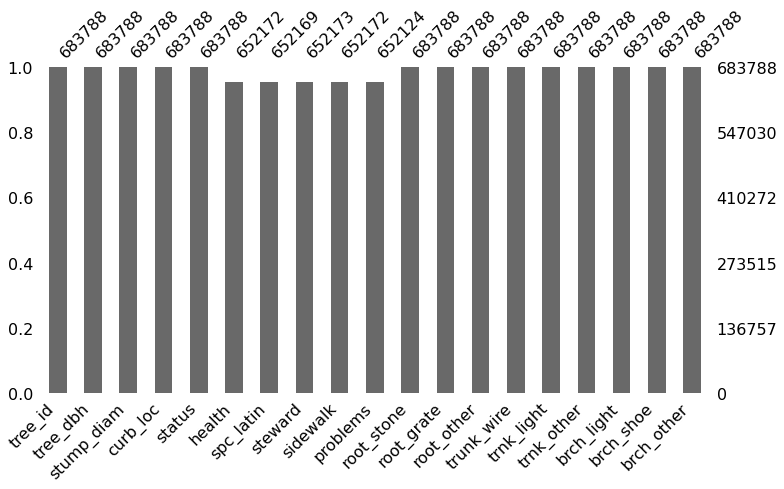

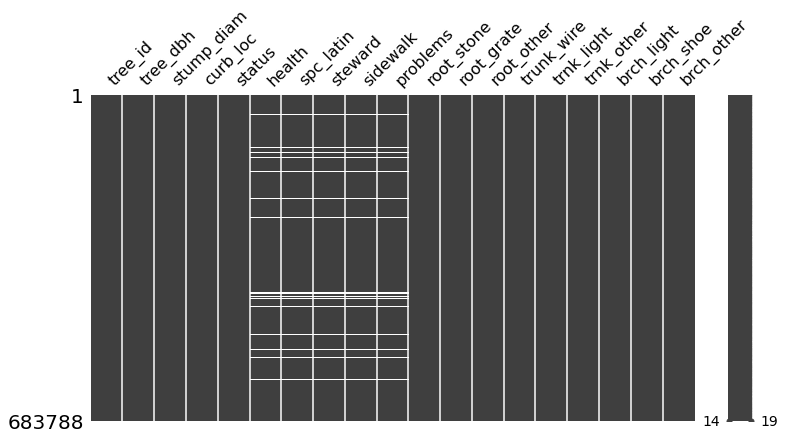

In [ ]:
msno.bar(tree_census_sub,figsize =(12,6))
msno.matrix(tree_census_sub,figsize =(12,6))

In [ ]:
tree_census_sub.describe() 
### get to know your data and spot the unlikely notice that the 50% of tree_dbh is only 9 but the maximun is 450 that not quite right as same as in the stump_diame the the value quite wrong at 140 (UNIT IN INCHES)

,tree_id,tree_dbh,stump_diam
count,683788.000000,683788.000000,683788.000000
mean,365205.011085,11.279787,0.432463
std,208122.092902,8.723042,3.290241
min,3.000000,0.000000,0.000000
25%,186582.750000,4.000000,0.000000
50%,366214.500000,9.000000,0.000000
75%,546170.250000,16.000000,0.000000
max,722694.000000,450.000000,140.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd69c57e050>,
      dtype=object)

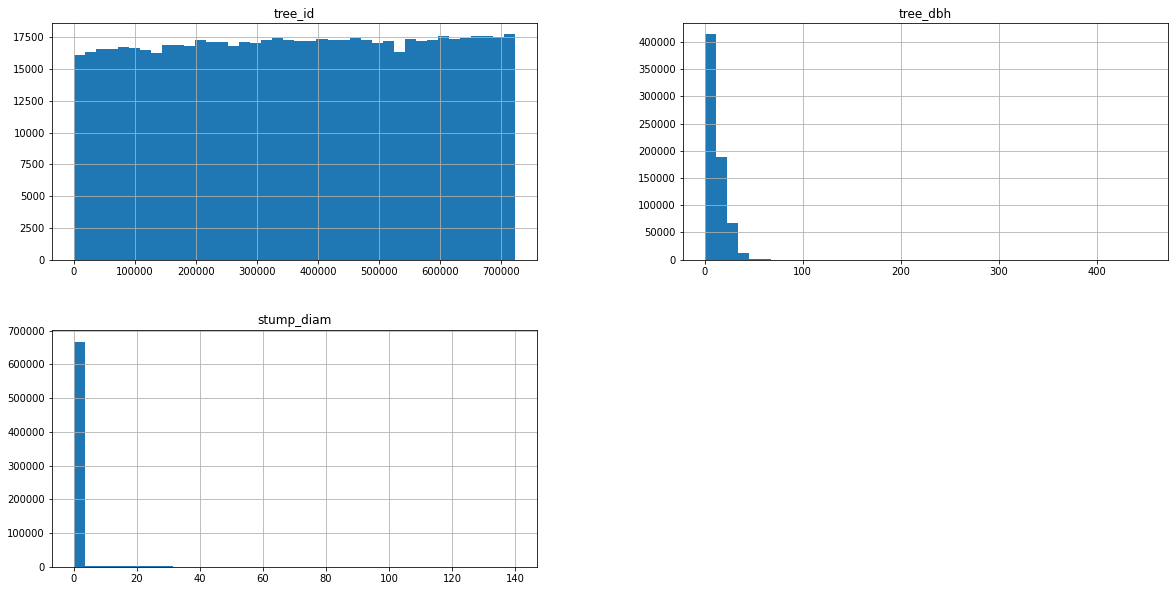

In [ ]:
tree_census_sub.hist(bins = 40, figsize =(20,10))

In [ ]:
big_trees = tree_census_sub[tree_census_sub['tree_dbh']>40]   # see all tree that has the diameter more than 40 inches
big_trees

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
83,203550,42,0,OnCurb,Alive,Good,Platanus x acerifolia,None,NoDamage,"Stones,BranchLights",Yes,No,No,No,No,No,Yes,No,No
600,170796,41,0,OnCurb,Alive,Good,Acer platanoides,None,Damage,"RootOther,TrunkOther",No,No,Yes,No,No,Yes,No,No,No
1041,160846,44,0,OnCurb,Alive,Good,Quercus palustris,None,NoDamage,None,No,No,No,No,No,No,No,No,No
1766,179540,43,0,OnCurb,Alive,Good,Quercus palustris,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No
2405,168583,425,0,OnCurb,Alive,Good,Quercus bicolor,1or2,Damage,None,No,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
682981,203435,50,0,OnCurb,Alive,Good,Platanus x acerifolia,None,NoDamage,"Stones,BranchLights",Yes,No,No,No,No,No,Yes,No,No
683190,203593,41,0,OnCurb,Alive,Good,Platanus x acerifolia,None,Damage,"Stones,BranchLights",Yes,No,No,No,No,No,Yes,No,No
683278,138146,41,0,OnCurb,Alive,Fair,Fraxinus pennsylvanica,None,NoDamage,None,No,No,No,No,No,No,No,No,No
683351,204041,41,0,OnCurb,Alive,Good,Platanus x acerifolia,1or2,NoDamage,RootOther,No,No,Yes,No,No,No,No,No,No


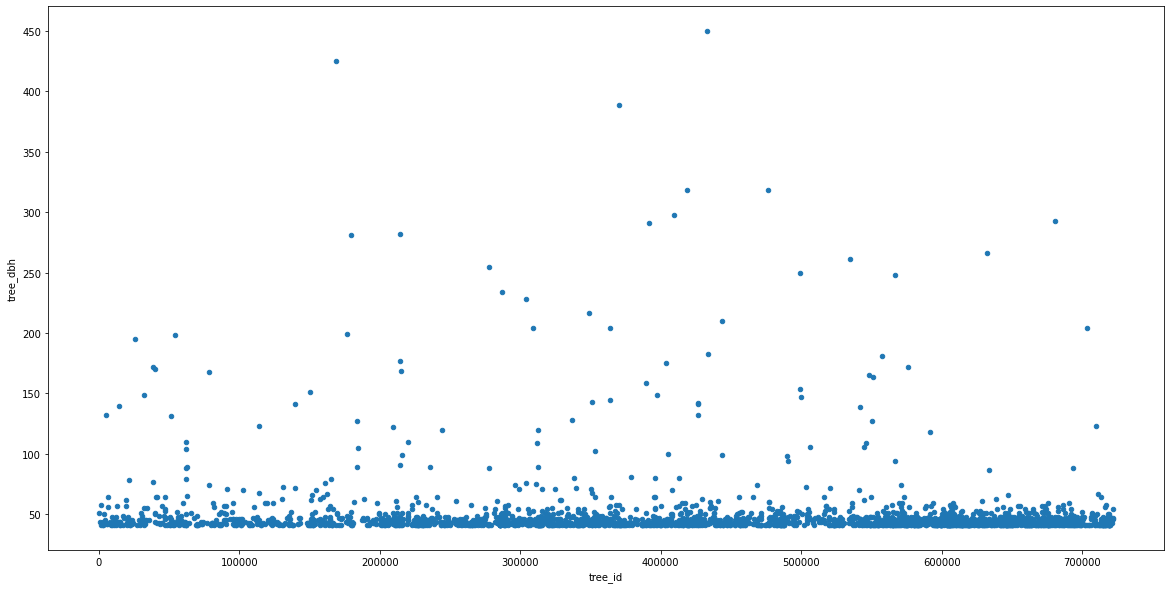

In [ ]:
big_trees[['tree_id','tree_dbh']].plot(kind='scatter', x='tree_id', y='tree_dbh', figsize = (20,10)) ###plot to spot thhe outlier

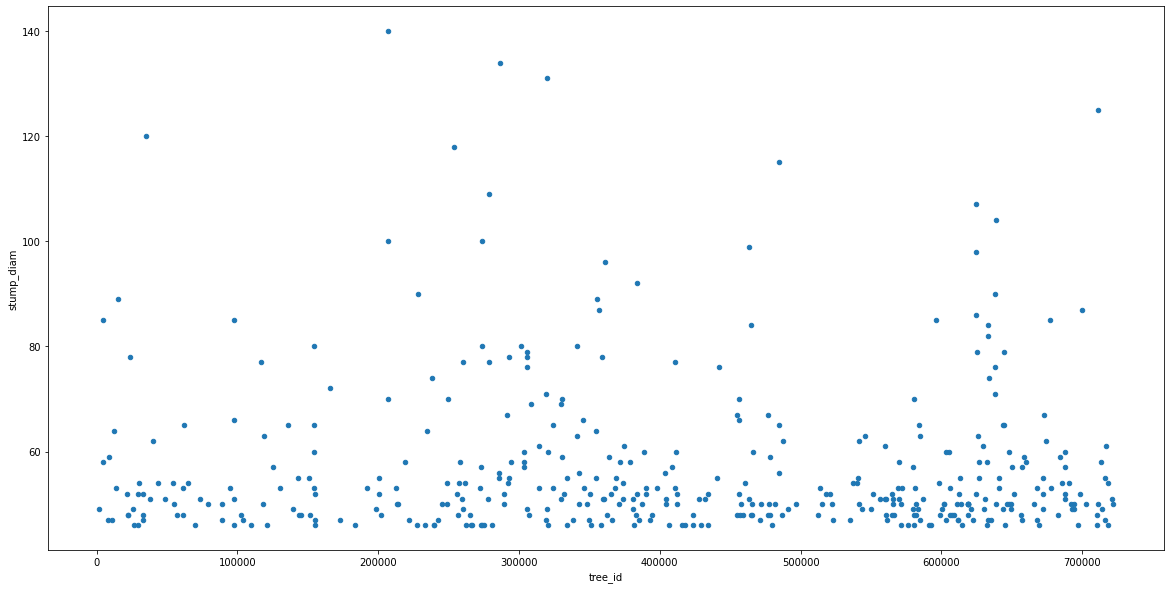

In [ ]:
big_trees_stump = tree_census_sub[tree_census_sub['stump_diam']>45]
big_trees_stump[['tree_id','stump_diam']].plot(kind='scatter', x='tree_id', y='stump_diam', figsize = (20,10)) ###plot to spot the outlier

Platanus x acerifolia                 87014
Gleditsia triacanthos var. inermis    64264
Pyrus calleryana                      58931
Quercus palustris                     53185
Acer platanoides                      34189
                                      ...  
Pinus nigra                              37
Pinus rigida                             33
Maclura pomifera                         29
Pinus sylvestris                         25
Pinus virginiana                         10
Name: spc_latin, Length: 132, dtype: int64

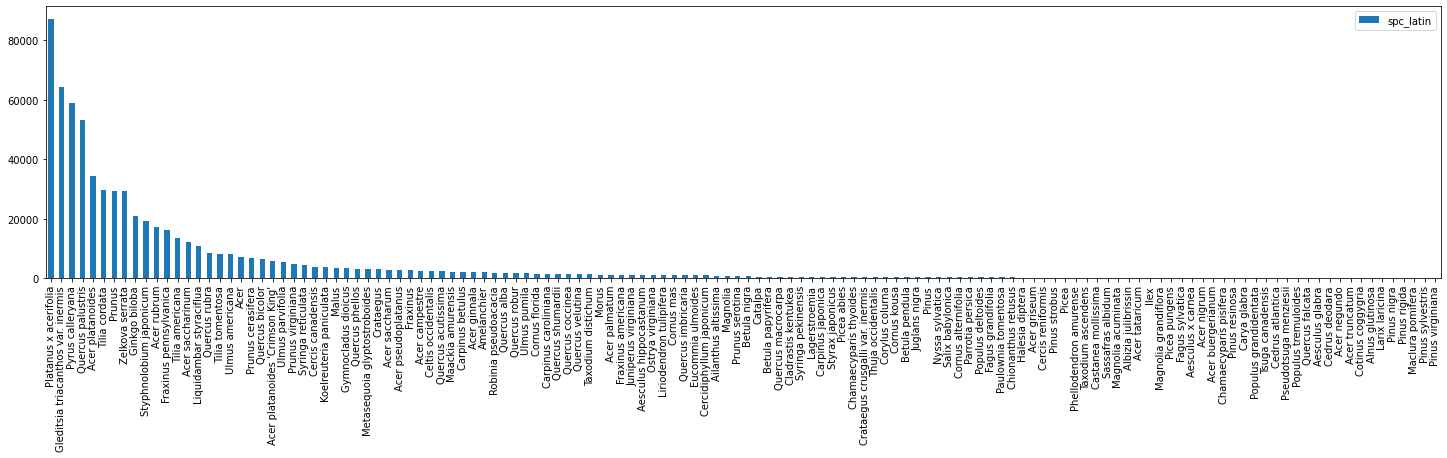

In [ ]:
pd.DataFrame(tree_census_sub['spc_latin'].value_counts()).plot(kind='bar',figsize=(25,5))
pd.value_counts(tree_census_sub['spc_latin'])


In [ ]:
tree_census_sub['spc_latin'].unique()

array(['Acer rubrum', 'Quercus palustris',
       'Gleditsia triacanthos var. inermis', 'Tilia americana',
       'Platanus x acerifolia', 'Ginkgo biloba', 'Quercus phellos',
       'Acer pseudoplatanus', 'Acer ginnala', nan, 'Acer campestre',
       'Ulmus americana', 'Fraxinus', 'Malus', 'Acer saccharinum',
       'Corylus colurna', 'Prunus serotina', 'Juniperus virginiana',
       'Acer platanoides', 'Liriodendron tulipifera',
       'Quercus acutissima', 'Quercus bicolor', 'Styphnolobium japonicum',
       'Chionanthus retusus', 'Magnolia grandiflora',
       'Liquidambar styraciflua', 'Pyrus calleryana', 'Quercus coccinea',
       'Chamaecyparis thyoides', 'Quercus velutina', 'Zelkova serrata',
       'Quercus alba', 'Aesculus glabra', 'Quercus rubra',
       'Tilia tomentosa', 'Carya glabra', 'Cladrastis kentukea', 'Morus',
       'Pseudotsuga menziesii', 'Lagerstroemia', 'Sassafras albidum',
       'Prunus', 'Picea', 'Ulmus parvifolia', 'Aesculus hippocastanum',
       'Ilex', '

In [ ]:
Stump_Tree = tree_census_sub[tree_census_sub['status']=='Stump']
Stump_Tree

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
37,211205,0,16,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
239,203597,0,15,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
641,179766,0,30,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
644,180619,0,10,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
646,208828,0,15,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683348,152836,0,13,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
683686,191219,0,25,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
683695,170888,0,5,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
683697,177922,0,17,OnCurb,Stump,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No


In [ ]:
Dead_Tree = tree_census_sub[tree_census_sub['status']=='Dead']  ##row value of stump and dead tree can add up close to the missing or NaN value so it not actually missing but it need to be None instead of missing
Dead_Tree

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
57,187807,0,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
196,208322,10,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
209,209058,6,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
266,210544,6,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
285,188609,9,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
682816,184342,11,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
682823,155430,2,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
683346,156566,10,0,OnCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No
683693,156162,3,0,OffsetFromCurb,Dead,NaN,NaN,NaN,NaN,NaN,No,No,No,No,No,No,No,No,No


In [ ]:
tree_problems = tree_census_sub[['root_stone','root_grate',"root_other"	,"trunk_wire",	"trnk_light",	"trnk_other",	"brch_light",	"brch_shoe",	"brch_other"]]
tree_problems

,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
0,No,No,No,No,No,No,No,No,No
1,Yes,No,No,No,No,No,No,No,No
2,No,No,No,No,No,No,No,No,No
3,Yes,No,No,No,No,No,No,No,No
4,Yes,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...
683783,No,No,No,No,No,No,No,No,No
683784,No,No,No,No,No,No,No,No,No
683785,No,No,No,No,No,No,No,No,No
683786,No,No,No,No,No,No,No,No,No


In [ ]:
tree_problems.apply(pd.Series.value_counts)

,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
No,543789,680252,653466,670514,682757,651215,621423,683377,659433
Yes,139999,3536,30322,13274,1031,32573,62365,411,24355


In [ ]:
tree_census_sub['health'].value_counts()

Good    528850
Fair     96504
Poor     26818
Name: health, dtype: int64

In [ ]:
mask_tree = ((tree_census_sub['status'] == 'Stump') | (tree_census_sub['status'] == 'Dead'))

In [ ]:
tree_census_sub.loc[mask_tree] = tree_census_sub.loc[mask_tree].fillna("Not Applicable") ##### fill NaN with not applicable

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1884: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, val, pi)


In [ ]:
tree_census_sub[tree_census_sub['status']=='Dead']


,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
57,187807,0,0,OnCurb,Dead,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,No,No,No,No,No,No,No,No,No
196,208322,10,0,OnCurb,Dead,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,No,No,No,No,No,No,No,No,No
209,209058,6,0,OnCurb,Dead,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,No,No,No,No,No,No,No,No,No
266,210544,6,0,OnCurb,Dead,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,No,No,No,No,No,No,No,No,No
285,188609,9,0,OnCurb,Dead,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,No,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
682816,184342,11,0,OnCurb,Dead,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,No,No,No,No,No,No,No,No,No
682823,155430,2,0,OnCurb,Dead,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,No,No,No,No,No,No,No,No,No
683346,156566,10,0,OnCurb,Dead,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,No,No,No,No,No,No,No,No,No
683693,156162,3,0,OffsetFromCurb,Dead,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,No,No,No,No,No,No,No,No,No


In [ ]:
##see othe missing value
tree_census_sub.isnull().sum()

tree_id        0
tree_dbh       0
stump_diam     0
curb_loc       0
status         0
health         1
spc_latin      5
steward        0
sidewalk       1
problems      49
root_stone     0
root_grate     0
root_other     0
trunk_wire     0
trnk_light     0
trnk_other     0
brch_light     0
brch_shoe      0
brch_other     0
dtype: int64

In [ ]:
tree_census_sub[tree_census_sub['health'].isna()] #### from the table above we see that there is one missing value in health column

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
32889,245041,16,0,OnCurb,Alive,NaN,Fraxinus pennsylvanica,None,Damage,None,No,No,No,No,No,No,No,No,No


In [ ]:
tree_census_sub['health'].value_counts() ##### most common value for health is Good so fill missing data with Good


Good              528850
Fair               96504
Not Applicable     31615
Poor               26818
Name: health, dtype: int64

In [ ]:
tree_census_sub['sidewalk'].value_counts() ##### most common value for sidewalk is NoDamage so fill with NoDamage

NoDamage          464978
Damage            187194
Not Applicable     31615
Name: sidewalk, dtype: int64

In [ ]:
tree_census_sub['problems'].value_counts()  ### the NaN value in proble should replace with None

None                                                                          426280
Stones                                                                         95673
Not Applicable                                                                 31615
BranchLights                                                                   29452
Stones,BranchLights                                                            17808
                                                                               ...  
Stones,RootOther,WiresRope,TrunkLights,TrunkOther,BranchLights,BranchOther         1
Stones,MetalGrates,TrunkLights,TrunkOther                                          1
MetalGrates,RootOther,TrunkLights,BranchLights                                     1
WiresRope,TrunkOther,BranchLights,Sneakers                                         1
MetalGrates,TrunkOther,Sneakers                                                    1
Name: problems, Length: 233, dtype: int64

In [ ]:
tree_census_sub[tree_census_sub['problems'].isna()] ### see the missing vale in column problems the NaN value in proble should replace with None

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
120289,332668,30,0,OffsetFromCurb,Alive,Fair,Quercus palustris,1or2,NoDamage,NaN,No,No,No,No,No,No,No,No,No
121488,332669,28,0,OffsetFromCurb,Alive,Fair,Quercus palustris,1or2,NoDamage,NaN,No,No,No,No,No,No,No,No,No
121685,332670,24,0,OffsetFromCurb,Alive,Fair,Quercus palustris,1or2,NoDamage,NaN,No,No,No,No,No,No,No,No,No
133470,332693,11,0,OffsetFromCurb,Alive,Good,Quercus palustris,1or2,NoDamage,NaN,No,No,No,No,No,No,No,No,No
133812,332692,15,0,OffsetFromCurb,Alive,Good,Quercus palustris,None,NoDamage,NaN,No,No,No,No,No,No,No,No,No
134820,332694,28,0,OffsetFromCurb,Alive,Good,Quercus palustris,1or2,NoDamage,NaN,No,No,No,No,No,No,No,No,No
144137,332947,3,0,OnCurb,Alive,Good,Ginkgo biloba,1or2,NoDamage,NaN,No,No,No,No,No,No,No,No,No
145324,332543,9,0,OnCurb,Alive,Good,Prunus,None,Damage,NaN,No,No,No,No,No,No,No,No,No
145337,332541,8,0,OnCurb,Alive,Good,Prunus,1or2,NoDamage,NaN,No,No,No,No,No,No,No,No,No
146314,332542,8,0,OnCurb,Alive,Good,Prunus,1or2,Damage,NaN,No,No,No,No,No,No,No,No,No


In [ ]:
##### fill with the most common value
tree_census_sub['problems'].fillna('None', inplace =True)
tree_census_sub['health'].fillna('Good', inplace =True)
tree_census_sub['spc_latin'].fillna('No Obervation', inplace =True)
tree_census_sub['sidewalk'].fillna('NoDamage', inplace =True)


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [ ]:
#### Now show what we get rid of the missing value so far
tree_census_sub.isnull().sum()

tree_id       0
tree_dbh      0
stump_diam    0
curb_loc      0
status        0
health        0
spc_latin     0
steward       0
sidewalk      0
problems      0
root_stone    0
root_grate    0
root_other    0
trunk_wire    0
trnk_light    0
trnk_other    0
brch_light    0
brch_shoe     0
brch_other    0
dtype: int64

In [ ]:
####### For now get rid with the outlier 
outlier_trees = tree_census_sub[(tree_census_sub['tree_dbh']>60) | (tree_census_sub['stump_diam']>60)]  # see all tree that has the diameter and dbh more than 60 inches
outlier_trees


,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
2405,168583,425,0,OnCurb,Alive,Good,Quercus bicolor,1or2,Damage,None,No,No,No,No,No,No,No,No,No
4887,139665,72,0,OffsetFromCurb,Alive,Good,Acer saccharinum,None,NoDamage,None,No,No,No,No,No,No,No,No,No
6466,166008,0,72,OnCurb,Stump,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,No,No,No,No,No,No,No,No,No
6724,209349,122,0,OnCurb,Alive,Good,Quercus palustris,None,Damage,None,No,No,No,No,No,No,No,No,No
7042,206818,0,100,OnCurb,Stump,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,No,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
667425,151958,66,0,OffsetFromCurb,Alive,Fair,Quercus rubra,None,NoDamage,None,No,No,No,No,No,No,No,No,No
673105,165324,79,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No
674016,184879,105,0,OnCurb,Alive,Fair,Ginkgo biloba,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No
681736,179366,281,0,OnCurb,Alive,Fair,Quercus palustris,None,Damage,None,No,No,No,No,No,No,No,No,No


In [ ]:
outlier_trees['spc_latin'].value_counts() 

Not Applicable                        95
Platanus x acerifolia                 27
Pyrus calleryana                      17
Quercus palustris                     16
Gleditsia triacanthos var. inermis    10
Acer saccharinum                       7
Tilia cordata                          7
Quercus phellos                        6
Acer platanoides                       6
Zelkova serrata                        5
Prunus                                 5
Ginkgo biloba                          4
Morus                                  4
Acer platanoides 'Crimson King'        4
Liquidambar styraciflua                3
Quercus rubra                          3
Ulmus americana                        3
Robinia pseudoacacia                   3
Fraxinus pennsylvanica                 2
Acer rubrum                            2
Ulmus pumila                           2
Quercus bicolor                        2
Quercus velutina                       2
Populus deltoides                      2
Liriodendron tul

In [ ]:
tree_census_sub = tree_census_sub[(tree_census_sub['tree_dbh']<=60) & (tree_census_sub['stump_diam']<=60)]
tree_census_sub

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
0,180683,3,0,OnCurb,Alive,Fair,Acer rubrum,None,NoDamage,None,No,No,No,No,No,No,No,No,No
1,200540,21,0,OnCurb,Alive,Fair,Quercus palustris,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No
2,204026,3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,1or2,Damage,None,No,No,No,No,No,No,No,No,No
3,204337,10,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No
4,189565,21,0,OnCurb,Alive,Good,Tilia americana,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683783,155433,25,0,OnCurb,Alive,Good,Quercus palustris,None,Damage,None,No,No,No,No,No,No,No,No,No
683784,183795,7,0,OnCurb,Alive,Good,Cladrastis kentukea,1or2,NoDamage,None,No,No,No,No,No,No,No,No,No
683785,166161,12,0,OnCurb,Alive,Good,Acer rubrum,None,Damage,None,No,No,No,No,No,No,No,No,No
683786,184028,9,0,OnCurb,Alive,Good,Acer rubrum,None,NoDamage,None,No,No,No,No,No,No,No,No,No


In [ ]:
Alive_tree = tree_census_sub[tree_census_sub['status']=='Alive']
Stump_or_dead_tree = tree_census_sub[(tree_census_sub['status']=='Dead') | (tree_census_sub['status']=='Stump')]

In [ ]:
Alive_tree.groupby('spc_latin')['tree_dbh'].describe() ###### notice we see min value weird @ 0


,count,mean,std,min,25%,50%,75%,max
spc_latin,,,,,,,,
Acer,7080.0,11.675424,6.577626,0.0,7.0,11.0,15.0,59.0
Acer buergerianum,110.0,8.090909,4.544470,2.0,5.0,8.0,10.0,28.0
Acer campestre,2549.0,7.103962,4.293100,0.0,4.0,6.0,9.0,35.0
Acer ginnala,2049.0,7.869204,4.853365,0.0,4.0,7.0,10.0,40.0
Acer griseum,220.0,3.509091,3.578846,1.0,2.0,2.0,3.0,30.0
...,...,...,...,...,...,...,...,...
Tsuga canadensis,88.0,5.193182,3.959153,0.0,2.0,3.5,7.0,21.0
Ulmus americana,7972.0,11.933768,9.374470,0.0,4.0,9.0,17.0,58.0
Ulmus parvifolia,5344.0,7.396894,5.669532,0.0,3.0,5.0,10.0,53.0


In [ ]:
Alive_tree[Alive_tree['tree_dbh']==0] ###it could be possible just new grown tree

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
5312,38793,0,0,OnCurb,Alive,Good,Cotinus coggygria,3or4,Damage,None,No,No,No,No,No,No,No,No,No
30524,204988,0,0,OnCurb,Alive,Good,Quercus phellos,1or2,NoDamage,None,No,No,No,No,No,No,No,No,No
44772,241329,0,0,OffsetFromCurb,Alive,Good,Malus,1or2,NoDamage,None,No,No,No,No,No,No,No,No,No
47154,173248,0,0,OnCurb,Alive,Good,Quercus bicolor,None,NoDamage,None,No,No,No,No,No,No,No,No,No
47484,204173,0,0,OnCurb,Alive,Poor,Picea abies,None,NoDamage,None,No,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
658977,162280,0,0,OnCurb,Alive,Poor,Quercus bicolor,None,Damage,None,No,No,No,No,No,No,No,No,No
671073,17796,0,0,OnCurb,Alive,Fair,Taxodium distichum,1or2,NoDamage,Stones,Yes,No,No,No,No,No,No,No,No
671971,120612,0,0,OnCurb,Alive,Good,Juniperus virginiana,None,NoDamage,None,No,No,No,No,No,No,No,No,No
672443,116239,0,0,OnCurb,Alive,Good,Acer palmatum,1or2,NoDamage,None,No,No,No,No,No,No,No,No,No


In [ ]:
status_alive = Alive_tree.groupby('spc_latin')['tree_dbh'].describe().reset_index()[['spc_latin', "25%", "75%"]]
status_alive

,spc_latin,25%,75%
0,Acer,7.0,15.0
1,Acer buergerianum,5.0,10.0
2,Acer campestre,4.0,9.0
3,Acer ginnala,4.0,10.0
4,Acer griseum,2.0,3.0
...,...,...,...
128,Tsuga canadensis,2.0,7.0
129,Ulmus americana,4.0,17.0
130,Ulmus parvifolia,3.0,10.0
131,Ulmus pumila,4.0,17.0


In [ ]:
Alive_tree = Alive_tree.merge(status_alive, on = 'spc_latin', how = 'left')
Alive_tree

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,problems,...,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,25%,75%
0,180683,3,0,OnCurb,Alive,Fair,Acer rubrum,None,NoDamage,None,...,No,No,No,No,No,No,No,No,5.0,14.0
1,200540,21,0,OnCurb,Alive,Fair,Quercus palustris,None,Damage,Stones,...,No,No,No,No,No,No,No,No,8.0,24.0
2,204026,3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,1or2,Damage,None,...,No,No,No,No,No,No,No,No,6.0,13.0
3,204337,10,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,None,Damage,Stones,...,No,No,No,No,No,No,No,No,6.0,13.0
4,189565,21,0,OnCurb,Alive,Good,Tilia americana,None,Damage,Stones,...,No,No,No,No,No,No,No,No,4.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
652018,155433,25,0,OnCurb,Alive,Good,Quercus palustris,None,Damage,None,...,No,No,No,No,No,No,No,No,8.0,24.0
652019,183795,7,0,OnCurb,Alive,Good,Cladrastis kentukea,1or2,NoDamage,None,...,No,No,No,No,No,No,No,No,3.0,5.0
652020,166161,12,0,OnCurb,Alive,Good,Acer rubrum,None,Damage,None,...,No,No,No,No,No,No,No,No,5.0,14.0
652021,184028,9,0,OnCurb,Alive,Good,Acer rubrum,None,NoDamage,None,...,No,No,No,No,No,No,No,No,5.0,14.0


In [ ]:
mask_v =Alive_tree['tree_dbh'] < Alive_tree['25%']  ############ now that we change the value that seems very low to the 25th percentile the same as very high value set to 75th percentile on the merge table
Alive_tree.loc[mask_v, 'tree_dbh'] = Alive_tree['25%']

mask_v = Alive_tree['tree_dbh'] > Alive_tree['75%']
Alive_tree.loc[mask_v, 'tree_dbh'] = Alive_tree['75%']

Alive_tree 

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,problems,...,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,25%,75%
0,180683,5.0,0,OnCurb,Alive,Fair,Acer rubrum,None,NoDamage,None,...,No,No,No,No,No,No,No,No,5.0,14.0
1,200540,21.0,0,OnCurb,Alive,Fair,Quercus palustris,None,Damage,Stones,...,No,No,No,No,No,No,No,No,8.0,24.0
2,204026,6.0,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,1or2,Damage,None,...,No,No,No,No,No,No,No,No,6.0,13.0
3,204337,10.0,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,None,Damage,Stones,...,No,No,No,No,No,No,No,No,6.0,13.0
4,189565,12.0,0,OnCurb,Alive,Good,Tilia americana,None,Damage,Stones,...,No,No,No,No,No,No,No,No,4.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
652018,155433,24.0,0,OnCurb,Alive,Good,Quercus palustris,None,Damage,None,...,No,No,No,No,No,No,No,No,8.0,24.0
652019,183795,5.0,0,OnCurb,Alive,Good,Cladrastis kentukea,1or2,NoDamage,None,...,No,No,No,No,No,No,No,No,3.0,5.0
652020,166161,12.0,0,OnCurb,Alive,Good,Acer rubrum,None,Damage,None,...,No,No,No,No,No,No,No,No,5.0,14.0
652021,184028,9.0,0,OnCurb,Alive,Good,Acer rubrum,None,NoDamage,None,...,No,No,No,No,No,No,No,No,5.0,14.0


In [ ]:
Stump_or_dead_tree

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
37,211205,0,16,OnCurb,Stump,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,No,No,No,No,No,No,No,No,No
57,187807,0,0,OnCurb,Dead,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,No,No,No,No,No,No,No,No,No
196,208322,10,0,OnCurb,Dead,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,No,No,No,No,No,No,No,No,No
209,209058,6,0,OnCurb,Dead,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,No,No,No,No,No,No,No,No,No
239,203597,0,15,OnCurb,Stump,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,No,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683693,156162,3,0,OffsetFromCurb,Dead,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,No,No,No,No,No,No,No,No,No
683695,170888,0,5,OnCurb,Stump,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,No,No,No,No,No,No,No,No,No
683697,177922,0,17,OnCurb,Stump,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,No,No,No,No,No,No,No,No,No
683698,193791,3,0,OnCurb,Dead,Not Applicable,Not Applicable,Not Applicable,Not Applicable,Not Applicable,No,No,No,No,No,No,No,No,No


In [ ]:
Stump_or_dead_tree['stump_diam'].value_counts()

0     13958
4       966
5       939
3       779
6       754
      ...  
58       12
60       10
57        8
59        6
56        4
Name: stump_diam, Length: 61, dtype: int64

In [ ]:
tree_census_sub

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
0,180683,3,0,OnCurb,Alive,Fair,Acer rubrum,None,NoDamage,None,No,No,No,No,No,No,No,No,No
1,200540,21,0,OnCurb,Alive,Fair,Quercus palustris,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No
2,204026,3,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,1or2,Damage,None,No,No,No,No,No,No,No,No,No
3,204337,10,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No
4,189565,21,0,OnCurb,Alive,Good,Tilia americana,None,Damage,Stones,Yes,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683783,155433,25,0,OnCurb,Alive,Good,Quercus palustris,None,Damage,None,No,No,No,No,No,No,No,No,No
683784,183795,7,0,OnCurb,Alive,Good,Cladrastis kentukea,1or2,NoDamage,None,No,No,No,No,No,No,No,No,No
683785,166161,12,0,OnCurb,Alive,Good,Acer rubrum,None,Damage,None,No,No,No,No,No,No,No,No,No
683786,184028,9,0,OnCurb,Alive,Good,Acer rubrum,None,NoDamage,None,No,No,No,No,No,No,No,No,No


In [ ]:
Alive_tree

,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,problems,...,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other,25%,75%
0,180683,5.0,0,OnCurb,Alive,Fair,Acer rubrum,None,NoDamage,None,...,No,No,No,No,No,No,No,No,5.0,14.0
1,200540,21.0,0,OnCurb,Alive,Fair,Quercus palustris,None,Damage,Stones,...,No,No,No,No,No,No,No,No,8.0,24.0
2,204026,6.0,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,1or2,Damage,None,...,No,No,No,No,No,No,No,No,6.0,13.0
3,204337,10.0,0,OnCurb,Alive,Good,Gleditsia triacanthos var. inermis,None,Damage,Stones,...,No,No,No,No,No,No,No,No,6.0,13.0
4,189565,12.0,0,OnCurb,Alive,Good,Tilia americana,None,Damage,Stones,...,No,No,No,No,No,No,No,No,4.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
652018,155433,24.0,0,OnCurb,Alive,Good,Quercus palustris,None,Damage,None,...,No,No,No,No,No,No,No,No,8.0,24.0
652019,183795,5.0,0,OnCurb,Alive,Good,Cladrastis kentukea,1or2,NoDamage,None,...,No,No,No,No,No,No,No,No,3.0,5.0
652020,166161,12.0,0,OnCurb,Alive,Good,Acer rubrum,None,Damage,None,...,No,No,No,No,No,No,No,No,5.0,14.0
652021,184028,9.0,0,OnCurb,Alive,Good,Acer rubrum,None,NoDamage,None,...,No,No,No,No,No,No,No,No,5.0,14.0


In [ ]:
tree_census_sub.sort_values(by ='tree_id', inplace =True)
dt = tree_census_sub
dt


/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,tree_id,tree_dbh,stump_diam,curb_loc,status,health,spc_latin,steward,sidewalk,problems,root_stone,root_grate,root_other,trunk_wire,trnk_light,trnk_other,brch_light,brch_shoe,brch_other
520015,3,24,0,OnCurb,Alive,Good,Quercus palustris,1or2,Damage,None,No,No,No,No,No,No,No,No,No
519740,4,20,0,OnCurb,Alive,Good,Quercus palustris,1or2,NoDamage,None,No,No,No,No,No,No,No,No,No
69626,7,3,0,OnCurb,Alive,Poor,Betula pendula,3or4,NoDamage,None,No,No,No,No,No,No,No,No,No
69627,8,3,0,OnCurb,Alive,Poor,Betula pendula,3or4,NoDamage,None,No,No,No,No,No,No,No,No,No
22786,9,4,0,OnCurb,Alive,Poor,Betula pendula,3or4,NoDamage,None,No,No,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497048,722690,3,0,OnCurb,Alive,Good,Tilia americana,None,NoDamage,None,No,No,No,No,No,No,No,No,No
498364,722691,2,0,OnCurb,Alive,Good,Acer rubrum,None,NoDamage,None,No,No,No,No,No,No,No,No,No
498284,722692,2,0,OnCurb,Alive,Good,Acer rubrum,None,NoDamage,None,No,No,No,No,No,No,No,No,No
496222,722693,3,0,OnCurb,Alive,Good,Tilia cordata,None,NoDamage,None,No,No,No,No,No,No,No,No,No


In [ ]:
dt.to_csv('Cleaned_data_tree_census_sub1.csv', header = True)